## $\textbf{1. Solution of Equations by Iteration}$

### 1.1 Newton-Raphson Method

Let $f: [a,b] \rightarrow \mathbb{R} $ be a  differentiable function defined on the interval \[a, b] with values in the real numbers $\mathbb{R}$.

It is a method for finding successively better approximations to the roots (or zeroes) of a real-valued function. 

$$ f(x) = 0 $$

The idea of the method is to starts with an initial guess which is reasonably **close** to the true root, then the function is approximated by its tangent line and x-intercept of this tangent line can be computed. This x-intercept will (usually) be a better approximation to the function's root than the original guess, and the method can be **iterated**.

**Derivation of Newton's Method** 

Let $\alpha\in\mathbb{R}$ be a zero of the function $f(x)$ i.e. $f(\alpha) = 0 $. Let $x_n$ be the $n^{th}$ approximation of $\alpha$. Provided that $f(x)$ first derivative exists at each $x_n$ and $f'(x_n)\neq 0$, we can approximate $f(\alpha)$ by *taylor series* centred around $x_n$. Then:

$$ f(\alpha) = f(x_n) + f'(x_n)(\alpha - x_n) + \epsilon_n$$ 

where $\epsilon_n = \frac{1}{2}f''(\xi_n)(\alpha - x_n)^2$ where $\xi_n\in[\alpha,x_n]$ is the *Lagrange form of the Taylor series expansion remainder*

Then we can say that:

$$ f(\alpha) \approx f(x_n) + f'(x_n)(\alpha - x_n) $$

Setting $f(\alpha)=0$ and letting $\alpha = x_{n+1}$ and after rearranging: 

 $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \quad \quad n = 0,1,2,...$$ 

**Definition: *Newton's Method* ** 

Newton's Method for the solution of $f(x) = 0$ is defined by:
 ### $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \quad \quad n = 0,1,2,...$$ ### 
with a prescribed starting value $x_0$. We implicitly assume when defining the above formula that $\bf{f'(x_n)\neq 0}$  $\forall n\geq 0$ 

**Theorem 1.1** (*An introduction to Numerical Analysis pp. 20*): *Suppose that $f$ is a real-valued function, defined and continuous in a neighbourhood of a real number $\alpha$, and let $f(\alpha) = 0$. Suppose further that $f'$ is defined and continuous in some neighbourood of $\alpha$, and let $f'(\alpha)\neq0$. Then, there exists $\delta$ such that $\{x_n\}^{\infty}_{n=0}$ defined by Newton's Method converges to $\alpha$ i.e $x_n \longrightarrow \alpha$ for any $x_0$ (initial guess) in the interval $x_0\in[\alpha - \delta,\alpha + \delta]$.*

**Example** : $cos(x) = x^3$

Set $\ f(x) = cos(x) - x^3 $ 

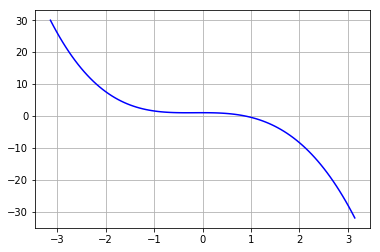

[2.1       +2.00000000e+00j 1.31984671+1.24973854e+00j
 0.84673483+7.17916721e-01j 0.59740279+2.54379557e-01j
 0.78985817-1.68946050e-01j 0.83567033+2.02096715e-02j
 0.86592458-1.23083370e-03j 0.86547276-1.07810336e-06j
 0.86547403+2.66049974e-12j 0.86547403+2.27232330e-24j
 0.86547403+0.00000000e+00j 0.86547403+0.00000000e+00j]

f(0.8654740331016144) = 1.1102230246251565e-16       #f(x) is approx equal to 0


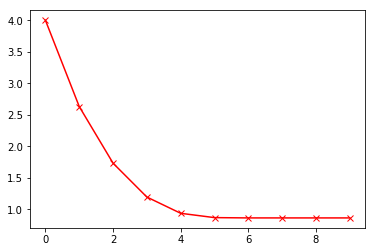

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

f = lambda x:  np.cos(x) - x**3 #x**5+1  
f_prime = lambda x:  -np.sin(x) - 3*x**2 #5*x**4 

X = np.linspace(-np.pi,np.pi,100)
plt.plot(X,f(X),'b');
plt.grid(True)
plt.show()

def newton(max_iteration,x_0,tol):       #starting guess x_0, tol = tolerance
    x_n = x_0
    list1 = [x_0]
    for i in range(max_iteration):
        x_tilde = x_n - (f(x_n)/f_prime(x_n)) 
        list1.append(x_tilde)
        if abs(x_n-x_tilde)< tol*abs(x_n):      #Relative Error
            break
        x_n = x_tilde 
    return list1

print(np.array(newton(30,2.1+2j,1e-40)))   #it even works when I choose x_0 to be imaginary
plt.plot(newton(30,4,1e-40),'r-x');
print()
print('f(%s) = %s       #f(x) is approx equal to 0' %(newton(30,4,1e-40)[-1],f(newton(30,4,1e-40)[-1])))

### 1.2 Secant Method ###

Using Newton's method to solve non-linear equation $f(x) = 0$ requires explicit knowledge of the first derivative $f'$ of the function $f$. Unfortunately, in many practical situations $f'$ is not explicitly available or it can only be obtained at high computational cost. In such cases, the value $f'(x_n)$ can be approximated by a difference of quotient; that is: 

$$ f'(x_n) \approx \frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n} $$

**Definition: *Secant Method* ** 

The Secant Method is defined by: 
### $$x_{n+1} = x_n - f(x_n)\left(\frac{x_{n+1}-x_n}{f(x_{n+1})-f(x_n)}\right) \quad \quad n = 0,1,2,...$$ ###
where $x_0$ and $x_1$ are the starting values. It is implicitly assumed here that $\bf{f(x_{n+1})-f(x_n)\neq 0}$ $\forall n\geq 0 $

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def Secant(max_iteration,x_0,x_1,tol):       #starting guess x_0, tol = tolerance
    list1 = [x_0,x_1]
    for i in range(max_iteration):
        f_p = f(list1[i])          #This means I do not have to calculate f'(x_n) everystep which speeds up my code
        list1.append(list1[i] - (f_p)*(list1[i+1]-list1[i])/(f(list1[i+1])-f_p))
        if abs(list1[i+1]-list1[i])< tol*abs(list1[i]):     #Relative Error
            break
    return list1

print('Table 1')
df = pd.DataFrame({'Secant Method': Secant(20,2,2.5,1e-2)})
df1 = pd.DataFrame({'Newton\'s Method': newton(20,2,1e-2)})
pd.concat([df,df1], axis=1)

Table 1


,Secant Method,Newton's Method
0,2.000000,2.000000
1,2.500000,1.348055
2,1.474647,1.001263
3,1.235104,0.880591
4,0.995766,0.865691
5,0.900245,0.865474
6,0.869428,NaN
7,0.865604,NaN
8,0.865475,NaN


***Rate of Convergence***

From Table 1, it can be seen, that for $f(x) = cos(x) - x^3$ shows the faster convergence of Newton's Method, but it must be remembered that each iteration of Newton's Method requires the computation of $f'(x_n)$ and $f(x_n)$, while the Secant Method only requires the calculation of $f(x_{n+1})$ only (as $f(x_n)$ has already been computed in previous step). In our example the computations are quite trivial, but in practical situation the calculation of each value of $f'(x_n)$ and $f(x_n)$ may require a substantial amount of work, and then each iteration of Newton's Method is likely to involve at least twice as much work as one iteration of Secant Method.

### 1.3 Bisection Method